# LBNL Baseline Dataset Reading

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, DistanceMetric
from sklearn.metrics import roc_curve, auc
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
from datetime import datetime

## Read in Data

In [2]:
real_data = pd.read_csv("../data/lbnl/real_ahu.csv")
real_data

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,8/28/2007 0:00,75.92,55,80.61,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
1,8/28/2007 0:01,75.71,55,80.68,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
2,8/28/2007 0:02,75.71,55,80.66,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
3,8/28/2007 0:03,75.60,55,80.69,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
4,8/28/2007 0:04,75.81,55,80.60,73.54,73.86,0,0,0.2,0.2,0.0,0.0,1.0,0.0,0.0,1.4,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,5/31/2009 23:55,66.88,55,67.31,66.44,72.60,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21596,5/31/2009 23:56,66.77,55,67.29,66.44,72.60,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21597,5/31/2009 23:57,66.88,55,67.23,66.54,72.71,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0
21598,5/31/2009 23:58,66.99,55,67.21,66.54,72.71,0,0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,1.4,0.0,0,0


In [3]:
simulated_data = pd.read_csv("../data/lbnl/simulated_ahu.csv")
simulated_data

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,8/28/2007 0:00,77.13,55,80.61,75.86,75.19,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.06,0,1
1,8/28/2007 0:01,77.63,55,80.68,75.38,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.17,0,1
2,8/28/2007 0:02,77.87,55,80.66,75.28,75.18,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.34,0,1
3,8/28/2007 0:03,77.95,55,80.69,75.27,75.20,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.57,0,1
4,8/28/2007 0:04,78.59,55,80.60,75.29,75.24,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,1.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,5/15/2009 23:55,62.56,55,55.62,55.62,57.88,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37436,5/15/2009 23:56,62.55,55,55.59,55.59,57.89,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37437,5/15/2009 23:57,62.54,55,55.50,55.50,57.89,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0
37438,5/15/2009 23:58,62.52,55,55.49,55.49,57.88,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.4,0.01,0,0


In [4]:
simulated_data['Fault Detection Ground Truth']

0        1
1        1
2        1
3        1
4        1
        ..
37435    0
37436    0
37437    0
37438    0
37439    0
Name: Fault Detection Ground Truth, Length: 37440, dtype: int64

In [5]:
from collections import Counter
Counter(simulated_data['Fault Detection Ground Truth'])


Counter({1: 18720, 0: 18720})

In [6]:
from collections import Counter
Counter(real_data['Fault Detection Ground Truth'])

Counter({1: 2880, 0: 18720})

## Inspecting Dates Available

In [7]:
real_data['Datetime'] = pd.to_datetime(real_data['Datetime'])
simulated_data['Datetime'] = pd.to_datetime(simulated_data['Datetime'])

In [8]:
np.unique(real_data['Datetime'].dt.date)

array([datetime.date(2007, 8, 28), datetime.date(2007, 8, 29),
       datetime.date(2007, 8, 30), datetime.date(2008, 8, 19),
       datetime.date(2008, 8, 25), datetime.date(2008, 9, 4),
       datetime.date(2009, 1, 19), datetime.date(2009, 2, 16),
       datetime.date(2009, 2, 17), datetime.date(2009, 5, 3),
       datetime.date(2009, 5, 4), datetime.date(2009, 5, 5),
       datetime.date(2009, 5, 6), datetime.date(2009, 5, 30),
       datetime.date(2009, 5, 31)], dtype=object)

The last two dates are not given in the dataset description. Since we cannot be sure whether they are faulty, let's drop them.

In [9]:
unknown_dates = ['2009-5-31', '2009-5-30'] 

for unknown_date in unknown_dates:
    real_data = real_data[real_data['Datetime'].dt.date != pd.to_datetime(unknown_date).date()]

In [10]:
np.unique(real_data['Datetime'].dt.date)

array([datetime.date(2007, 8, 28), datetime.date(2007, 8, 29),
       datetime.date(2007, 8, 30), datetime.date(2008, 8, 19),
       datetime.date(2008, 8, 25), datetime.date(2008, 9, 4),
       datetime.date(2009, 1, 19), datetime.date(2009, 2, 16),
       datetime.date(2009, 2, 17), datetime.date(2009, 5, 3),
       datetime.date(2009, 5, 4), datetime.date(2009, 5, 5),
       datetime.date(2009, 5, 6)], dtype=object)

In [11]:
np.unique(simulated_data['Datetime'].dt.date)

array([datetime.date(2007, 8, 28), datetime.date(2007, 8, 29),
       datetime.date(2007, 8, 30), datetime.date(2007, 8, 31),
       datetime.date(2007, 9, 1), datetime.date(2007, 9, 2),
       datetime.date(2007, 9, 5), datetime.date(2007, 9, 6),
       datetime.date(2008, 2, 12), datetime.date(2008, 5, 6),
       datetime.date(2008, 5, 7), datetime.date(2008, 5, 8),
       datetime.date(2008, 5, 15), datetime.date(2008, 8, 27),
       datetime.date(2008, 8, 28), datetime.date(2008, 8, 29),
       datetime.date(2008, 8, 30), datetime.date(2008, 8, 31),
       datetime.date(2008, 9, 1), datetime.date(2008, 9, 4),
       datetime.date(2008, 9, 5), datetime.date(2009, 2, 11),
       datetime.date(2009, 5, 6), datetime.date(2009, 5, 7),
       datetime.date(2009, 5, 8), datetime.date(2009, 5, 15)],
      dtype=object)

Add unique IDs to each date to make sequencing the data easier

In [12]:
df_data_real = real_data
df_data_real = df_data_real.set_index('Datetime')

df_data_sim  = simulated_data
df_data_sim  = df_data_sim.set_index('Datetime')

In [13]:
# Filter out normal samples from the simulated dataset for training
df_data_sim_normal = df_data_sim[df_data_sim['Fault Detection Ground Truth'] == 0]

In [14]:
cols = df_data_real.columns.drop("Fault Detection Ground Truth")

In [15]:
scaler = MinMaxScaler()
scaled_df_sim_normal = df_data_sim_normal.drop('Fault Detection Ground Truth', axis=1)
scaled_df_sim_normal = scaler.fit_transform(scaled_df_sim_normal)
scaled_df_sim_normal = pd.DataFrame(scaled_df_sim_normal, index=df_data_sim_normal.index, columns=cols)

scaled_df_data_real = df_data_real.drop('Fault Detection Ground Truth', axis=1)
scaled_df_data_real = scaler.transform(scaled_df_data_real.values)
scaled_df_data_real = pd.DataFrame(scaled_df_data_real, index=df_data_real.index, columns=cols)

# scaled_df_sim_normal = scaler.fit_transform(df_data_sim_normal.drop('Fault Detection Ground Truth', axis=1).values)
# scaled_df_sim_normal = pd.DataFrame(scaled_df_sim_normal, index=df_data_sim_normal.index, columns=cols)

# scaled_df_data_real = scaler.fit_transform(df_data_real.drop('Fault Detection Ground Truth', axis=1).values)
# scaled_df_data_real = pd.DataFrame(scaled_df_data_real, index=df_data_real.index, columns=cols)

c:\Users\rheah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [16]:
def same_day(date1, date2):
    date1 = pd.to_datetime(date1)
    date2 = pd.to_datetime(date2)
    return date1.date() == date2.date()

TIME_STEPS = 10
dropped_idx = []

def create_sequences(data, time_steps=TIME_STEPS):
    values = data.values
    times = data.index
    output = []
    indices = []
    for i in range(len(values) - time_steps + 1):
        if same_day(times[i], times[i+time_steps-1]):
            output.append(values[i : (i + time_steps)])
            indices.append(i + time_steps - 1)
        else:
            dropped_idx.append(i+time_steps-1)
    return np.stack(output), indices

x_train, train_indices = create_sequences(scaled_df_sim_normal)
print("Training input shape: ", x_train.shape)

x_test, test_indices = create_sequences(scaled_df_data_real)
print("Testing input shape: ", x_test.shape)

Training input shape:  (18603, 10, 17)
Testing input shape:  (18603, 10, 17)


In [17]:
ae_model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
    layers.LSTM(16, activation="relu", return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(4, activation="relu", return_sequences=False),
    layers.RepeatVector(x_train.shape[1]),
    layers.LSTM(4, activation="relu", return_sequences=True),
    layers.Dropout(0.2), 
    layers.LSTM(16, activation="relu", return_sequences=True),
    layers.TimeDistributed(layers.Dense(x_train.shape[2]))
])

ae_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="mae")
ae_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 16)            2176      
                                                                 
 dropout (Dropout)           (None, 10, 16)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVecto  (None, 10, 4)             0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 10, 4)             144       
                                                                 
 dropout_1 (Dropout)         (None, 10, 4)             0         
                                                        

In [18]:
ae_history = ae_model.fit(
    x_train,
    x_train,
    epochs=100,
    batch_size=64,
    validation_split=0.05,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)


Epoch 1/100
277/277 [==============================] - 6s 10ms/step - loss: 0.3966 - val_loss: 0.4508
Epoch 2/100
277/277 [==============================] - 3s 9ms/step - loss: 0.3312 - val_loss: 0.3286
Epoch 3/100
277/277 [==============================] - 3s 9ms/step - loss: 0.2472 - val_loss: 0.2353
Epoch 4/100
277/277 [==============================] - 3s 9ms/step - loss: 0.1762 - val_loss: 0.1733
Epoch 5/100
277/277 [==============================] - 3s 9ms/step - loss: 0.1314 - val_loss: 0.1333
Epoch 6/100
277/277 [==============================] - 3s 9ms/step - loss: 0.1058 - val_loss: 0.1157
Epoch 7/100
277/277 [==============================] - 3s 9ms/step - loss: 0.0900 - val_loss: 0.1060
Epoch 8/100
277/277 [==============================] - 3s 10ms/step - loss: 0.0791 - val_loss: 0.1009
Epoch 9/100
277/277 [==============================] - 3s 10ms/step - loss: 0.0720 - val_loss: 0.0981
Epoch 10/100
277/277 [==============================] - 3s 10ms/step - loss: 0.0676 - va

In [19]:
test_recons = ae_model.predict(x_test)
test_recons = test_recons[:,TIME_STEPS-1,:]
x_test_unseq = x_test[:,TIME_STEPS-1,:]
error = abs(test_recons - x_test_unseq)
error_means = np.mean(error, axis=1) # Take row average of each error
error_means_mean = np.mean(error_means) # Average the row average (overall error mean) 
sd = np.std(error_means) # Standard deviation of row average
anomaly_probs = (error_means-error_means_mean)/(2*sd) 
anomaly_probs = (anomaly_probs - np.min(anomaly_probs)) / (np.max(anomaly_probs) - np.min(anomaly_probs)) # standardize to represent as probabilities

582/582 [==============================] - 2s 2ms/step


In [20]:
df_data_real_faults = df_data_real['Fault Detection Ground Truth']
df_data_real_faults_adjusted = df_data_real_faults.iloc[test_indices]

In [21]:
# Ensure the lengths are the same after adjustment
assert len(df_data_real_faults_adjusted) == x_test.shape[0], "Length mismatch after adjustment"

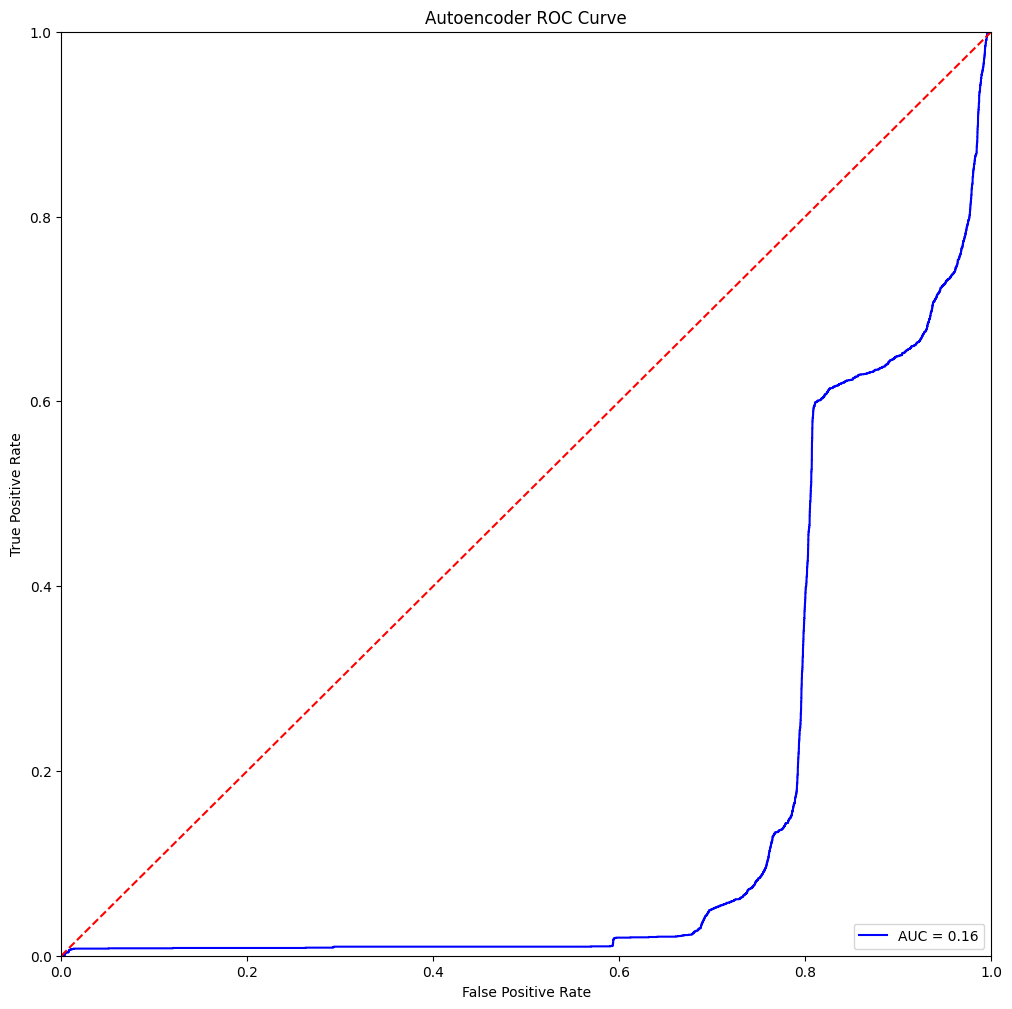

In [22]:
# Now use the adjusted anomaly_probs for ROC curve calculation
ae_fpr, ae_tpr, ae_thresh = roc_curve(df_data_real_faults_adjusted, anomaly_probs)
ae_roc_auc = auc(ae_fpr, ae_tpr)

plt.figure(figsize=(12,12))
plt.title('Autoencoder ROC Curve')
plt.plot(ae_fpr, ae_tpr, 'b', label = 'AUC = %0.2f' % ae_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## let's try more complex architecture

In [23]:
from kerastuner import RandomSearch
from tensorflow.keras import regularizers

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(x_train.shape[1], x_train.shape[2])))
    
    # Encoder
    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(layers.LSTM(hp.Int('units_' + str(i), min_value=4, max_value=16, step=4),
                              activation=hp.Choice('activation', ['relu', 'tanh']),
                              return_sequences=True if i < hp.Int('num_layers', 2, 4) - 1 else False,
                              kernel_regularizer=regularizers.l2(0.01)))
        model.add(layers.Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    
    model.add(layers.RepeatVector(x_train.shape[1]))
    
    # Decoder
    for i in range(hp.Int('num_layers', 2, 4) - 1, -1, -1): # Going in reverse order to symmetrically add LSTM layers
        model.add(layers.LSTM(hp.Int('units_' + str(i), min_value=4, max_value=16, step=4),
                              activation=hp.Choice('activation', ['relu', 'tanh']),
                              return_sequences=True,
                              kernel_regularizer=regularizers.l2(0.01)))
        model.add(layers.Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
        
    model.add(layers.TimeDistributed(layers.Dense(x_train.shape[2]))) # Ensure output has same shape as input
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='auto_tuner_dir',
    project_name='anomaly_detection')

tuner.search_space_summary()

tuner.search(x_train, x_train, epochs=100, batch_size=64, 
             validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")])

best_model = tuner.get_best_models()[0]

INFO:tensorflow:Reloading Tuner from auto_tuner_dir\anomaly_detection\tuner0.json
Search space summary
Default search space size: 7
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 4, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 4, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 4, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 16, 'step': 4, 'sampling': 'linear'}
INFO:tensorflow:Oracle triggered exit


C:\Users\rheah\AppData\Local\Temp\ipykernel_8472\3471144554.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [24]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 4)             352       
                                                                 
 dropout (Dropout)           (None, 10, 4)             0         
                                                                 
 lstm_1 (LSTM)               (None, 12)                816       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 repeat_vector (RepeatVecto  (None, 10, 12)            0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 10, 12)            1200      
                                                        

In [25]:
test_recons = best_model.predict(x_test)
test_recons = test_recons[:,TIME_STEPS-1,:]
x_test_unseq = x_test[:,TIME_STEPS-1,:]
error = abs(test_recons - x_test_unseq)
error_means = np.mean(error, axis=1) # Take row average of each error
error_means_mean = np.mean(error_means) # Average the row average (overall error mean) 
sd = np.std(error_means) # Standard deviation of row average
anomaly_probs = (error_means-error_means_mean)/(2*sd) 
anomaly_probs = (anomaly_probs - np.min(anomaly_probs)) / (np.max(anomaly_probs) - np.min(anomaly_probs)) # standardize to represent as probabilities

582/582 [==============================] - 2s 2ms/step


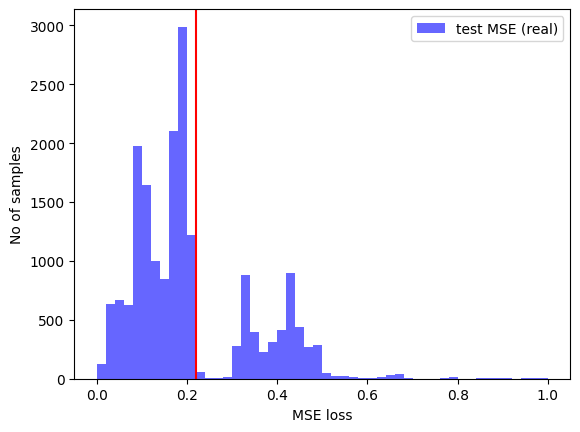

In [31]:
threshold = 0.22
plt.hist(anomaly_probs, bins=50, color='blue', alpha=0.6, label="test MSE (real)")

plt.axvline(x=threshold, color='red')
plt.xlabel("MSE loss")
plt.ylabel("No of samples")
plt.legend(loc='upper right')  # Displaying the legend to distinguish the histograms
plt.show()

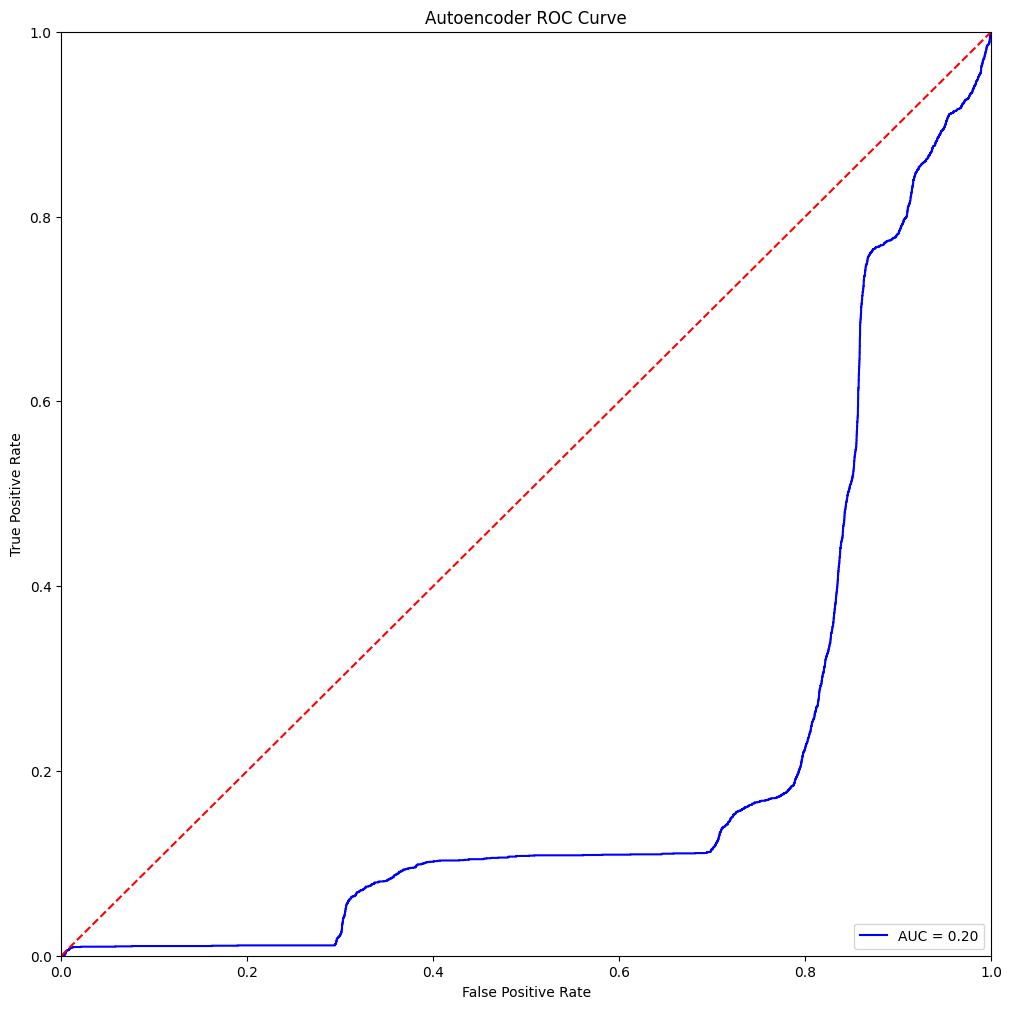

In [26]:
ae_fpr, ae_tpr, ae_thresh = roc_curve(df_data_real_faults_adjusted, anomaly_probs)
ae_roc_auc = auc(ae_fpr, ae_tpr)

plt.figure(figsize=(12,12))
plt.title('Autoencoder ROC Curve')
plt.plot(ae_fpr, ae_tpr, 'b', label = 'AUC = %0.2f' % ae_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

pred_real_label = (anomaly_probs > 0.66).astype(int)
conf_matrix = confusion_matrix(df_data_real_faults_adjusted, pred_real_label)
print(conf_matrix)

# Metrics
accuracy = accuracy_score(df_data_real_faults_adjusted, pred_real_label)
f1 = f1_score(df_data_real_faults_adjusted, pred_real_label)
conf_matrix = confusion_matrix(df_data_real_faults_adjusted, pred_real_label)
auc = roc_auc_score(df_data_real_faults_adjusted, pred_real_label)
fpr, tpr, _ = roc_curve(df_data_real_faults_adjusted, pred_real_label)

print("Accuracy: ", accuracy)
print("\nf1: ", f1)
print("\nconf_matrix: ", conf_matrix)
print("\nauc: ", auc)
print("\nfpr: ", fpr)
print("\ntpr: ", tpr)

[[15661    80]
 [ 2847    15]]
Accuracy:  0.8426597860560124

f1:  0.010145417653026716

conf_matrix:  [[15661    80]
 [ 2847    15]]

auc:  0.500079410456769

fpr:  [0.         0.00508227 1.        ]

tpr:  [0.         0.00524109 1.        ]


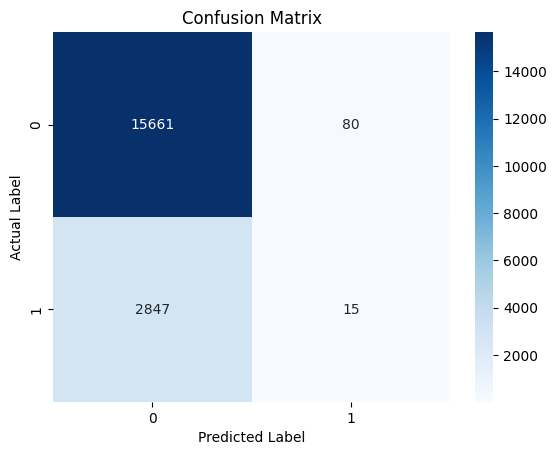

In [38]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
thresholds = np.linspace(0.01, 1, 100)  # 100 thresholds evenly spaced

best_threshold = None
best_auc = -1

for threshold in thresholds:
    pred_real_label = (anomaly_probs > threshold).astype(int)
    auc = roc_auc_score(df_data_real_faults_adjusted, pred_real_label)
    
    if auc > best_auc:
        best_auc = auc
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best AUC: {best_auc}")

Best Threshold: 0.66
Best AUC: 0.500079410456769
